# Stream254 : Enhancing Your Movie Watching Experience with Uncharted Cinematic Treasures

### GROUP 5

#### Authors:
1. Caroline Ngabu
2. Muhsin Ahmed
3. Richard Muriithi
4. David Kirianja
5. Beatrice Kariuki

## BUSINESS UNDERSTANDING

### INTRODUCTION

The streaming landscape in Kenya has experienced remarkable growth recently, fueled by factors such as; improved internet connectivity and a rising preference for personalized entertainment experiences. As consumers increasingly turn to on-demand platforms, companies like Stream254 are faced with the challenge of enhancing user engagement to maintain competitiveness.

In response, Stream254 is embarking on a mission to revolutionize user engagement through cutting-edge technology. By implementing an advanced recommendation system, Stream254 aims to provide bespoke movie recommendations, thus addressing the growing demand for personalized content in the Kenyan streaming market.

### BUSINESS PROBLEM STATEMENT

Stream254 recognizes that traditional one-size-fits-all approaches to content delivery are no longer sufficient to meet the evolving demands of Kenyan viewers. Without personalized recommendations, users may face decision fatigue and frustration when navigating the platform's extensive content library. In a highly competitive market, failure to engage users effectively could lead to decreased retention rates and loss of market share.

To address this challenge, Stream254 seeks to implement a recommendation system that leverages machine learning algorithms to analyze user data and deliver highly relevant movie recommendations. By doing so, Stream254 aims to enhance user satisfaction, drive long-term engagement, and establish itself as a leader in the Kenyan streaming space.

The primary stakeholders of this project include:

1. **Online Streaming Platforms**: Companies like Netflix, Amazon Prime Video, and Hulu can integrate this recommendation system to enhance user experience, increase viewer engagement, and reduce churn rates by providing tailored movie suggestions. 

2. **Users**: Individual users of streaming services stand to benefit from a more personalized viewing experience, leading to improved satisfaction and discovery of new content aligned with their tastes.

3. **Content Creators and Distributors**: By promoting movies that are likely to be well-received, the system can help content creators and distributors reach their target audience more effectively, thereby increasing viewership and revenue from underexposed content. 

### OBJECTIVES

Develop and implement state-of-the-art recommendation algorithm that will analyze user behaviour, preferences, and viewing patterns to generate personalized movie recommendations with the intention to:

1. **Enhance User Satisfaction**: By providing users with tailored movie recommendations, we aim to enhance user satisfaction and deliver an immersive viewing experience that keeps users coming back for more.

2. **Increase User Retention**: Through personalized recommendations, we seek to increase user retention rates and encourage users to spend more time on the platform, ultimately driving revenue growth and profitability.

3. **Establish Competitive Differentiation**: By offering a recommendation system that surpasses those of competitors, we aim to differentiate Stream254 as the go-to destination for personalized entertainment experiences in the Kenyan market.

4. **Implement Performance Metrics**: We will implement robust metrics and analytics to measure the performance of the recommendation system. This will enable us to continuously optimize algorithms and enhance user engagement over time.

## DATA UNDERSTANDING

The ml-latest-small dataset is a collection of data from MovieLens, a movie recommendation service. It comprises user ratings and free-text tagging activities, offering insights into user preferences. This dataset contains a total of 100,836 movie ratings and 3,683 tag applications across 9,742 movies.This dataset was generated on September 26th 2018.

This is a development dataset which means that it is a portion of data utilized for development and fine-tuning of machine learning models. These types of datasets are used in fine-tuning and optimizing models by tweaking hyper-parameters, adjusting architecture, and diagnosing potential overfitting. They are primarily employed for evaluating model performance and guiding improvements, rather than training.

The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv and are contained in the ’Data’ file of this GitHub repository.

**Dataset Details**

- Ratings: There are 100,836 user ratings, primarily based on a 5-star scale.
- Tags: The dataset includes 3,683 instances of user-generated tags for movies.
- Users: All 610 users captured were chosen at random and each user has rated at least 20 movies.
- Timeframe: The data spans a period from March 29, 1996, to September 24, 2018.
- No Demographic Data: Notably, this dataset does not include any demographic information about the users. Each user is identified solely by a unique numerical identifier.
- File Structure: The dataset is organized into four main files: links.csv, movies.csv, ratings.csv, and tags.csv.

Out of the four datasets, only movie.csv and ratings.csv will be used for the analysis
The dataset comprises four files of which we will use two main files:

movies.csv: This file contains information about movies and includes the following columns:

movieId: A unique numerical identifier for each movie.
title: The title of the movie.
genres: A list of genres associated with the movie, separated by the pipe (|) character.
ratings.csv: This file contains user ratings for movies and includes the following columns:

userId: A unique numerical identifier for each user.
movieId: The corresponding movie identifier, linking each rating to a specific movie.
rating: The user's numerical rating for the movie.

#### Limitations of the Data

1. **Cold Start Problem:** New movies or users with few ratings pose a challenge, as there's limited data to base recommendations on.
2. **Bias in User Ratings:** Ratings are subjective and can be biased, affecting the system's ability to accurately predict preferences.
3. **Sparsity of the Ratings Matrix:** With a large number of movies and users but relatively fewer ratings, the ratings matrix is sparse, which can complicate the modeling process.

### DATA PREPARATION

### Import relevant libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Standard libraries for data manipulation and visualization
import pandas as pd                 
import numpy as np                  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Specific models and tools from surprise that will be used in this notebook
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import Reader, Dataset
import random

### Load `movies.csv`

In [2]:
movies_df = pd.read_csv('Data/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", movies_df.shape[0])
print("Number of Columns:", movies_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [4]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(movies_df.dtypes)

Data Types of Columns:
movieId     int64
title      object
genres     object
dtype: object


### Load `ratings.csv`


In [5]:
ratings_df = pd.read_csv('Data/ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", ratings_df.shape[0])
print("Number of Columns:", ratings_df.shape[1])

Dataset Shape:
Number of Rows: 100836
Number of Columns: 4


In [7]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(ratings_df.dtypes)

Data Types of Columns:
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object


In [8]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


**Key Insights from ratings_df:**

1. **Rating Range:** Users have provided ratings in a range from 0.5 to 5.0, indicating diverse opinions about the movies.

2. **Average Rating:** The average rating across all movies is 3.5, suggesting that users, on average, tend to give moderate ratings.

3. **User IDs:** The dataset includes user IDs ranging from 1 to 610, representing a total of 610 unique users.

4. **Movie IDs:** Movie IDs span from 1 to 193609, with 193609 being the highest movie ID. Note that this represents the highest movie ID and not necessarily the total count of movies in the dataset.

These insights provide a foundational understanding of the dataset's characteristics and the user-movie interactions.

### Loading `tags.csv`

In [9]:
tags_df = pd.read_csv('Data/tags.csv')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [10]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", tags_df.shape[0])
print("Number of Columns:", tags_df.shape[1])

Dataset Shape:
Number of Rows: 3683
Number of Columns: 4


In [11]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(tags_df.dtypes)

Data Types of Columns:
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


In [12]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [13]:
ratings_df.drop(['timestamp'], axis=1, inplace=True)

### Loading `links.csv`

In [14]:
links_df = pd.read_csv('Data/links.csv')
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [15]:
# Display the shape of the dataset (number of rows and columns)
print("Dataset Shape:")
print("=================")
print("Number of Rows:", links_df.shape[0])
print("Number of Columns:", links_df.shape[1])

Dataset Shape:
Number of Rows: 9742
Number of Columns: 3


In [16]:
# Display the data types of columns
print("Data Types of Columns:")
print("============================")
print(links_df.dtypes)

Data Types of Columns:
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


In [17]:
links_df.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


### Merge `movies_df` & `ratings_df`

Most import dataset for the analysis were the movies and the ratings datasest

In [18]:
# Merge the datasets on the 'movieId' column
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

In [19]:
# Display the first five rows of the merged dataset
print("Merged_df head:")
print("============================")
merged_df.head()

Merged_df head:


,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [20]:
print("Merged Dataset Shape:")
print("==========================")
print("Number of Rows:", merged_df.shape[0])
print("Number of Columns:", merged_df.shape[1])

Merged Dataset Shape:
Number of Rows: 100836
Number of Columns: 5


### Visualization on the dataset

In [21]:
# Split the genres within each entry and create a list of genres
def find_genres(movies_df):
    genres = {}  # dictionary to store different genre values

    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

In [22]:
genre_counts = find_genres(movies_df)
genre_counts

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [23]:
# First, split the genres within each entry and create a list of genres
genres_list = movies_df['genres'].str.split('|').tolist()

# Now, flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Print the counts of each genre
print(genre_counts)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [24]:
# First, split the genres within each entry and create a list of genres
genres_list = movies_df['genres'].str.split('|').tolist()

# Now, flatten the list of lists into a single list of genres
all_genres = [genre for sublist in genres_list for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Convert the series to a dictionary
genre_counts_dict = genre_counts.to_dict()

# Print the genre counts as a dictionary
print(genre_counts_dict)

{'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34}


In [25]:
genre_counts['None'] = genre_counts.pop('(no genres listed)')

In [26]:
genre_counts  # Counts of all listed genres within dataset

Drama          4361
Comedy         3756
Thriller       1894
Action         1828
Romance        1596
Adventure      1263
Crime          1199
Sci-Fi          980
Horror          978
Fantasy         779
Children        664
Animation       611
Mystery         573
Documentary     440
War             382
Musical         334
Western         167
IMAX            158
Film-Noir        87
None             34
Name: count, dtype: int64

### Check for  Missing Values

In [27]:
merged_df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

In [28]:
merged_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


### FEATURE ENGINEERING

We undertook feature engineering to create a new column release_year by extracting the year the movie was released from the end of the title string. We then converted the years to decades.

In [29]:
merged_df['release_year'] = merged_df['title'].str.extract(r'\((\d{4})\)$', expand=False)
merged_df['release_year'] = pd.to_numeric(merged_df['release_year'], errors='coerce').astype('Int64')
merged_df.head()

,userId,movieId,rating,title,genres,release_year
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995


In [30]:
merged_df.isna().sum()

userId           0
movieId          0
rating           0
title            0
genres           0
release_year    31
dtype: int64

In [31]:
no_missing = merged_df.isna().sum()
percent_missing = ( merged_df.isna().sum() * 100/len(merged_df)).round(2)
missing_value_df = pd.DataFrame({'no_missing_values':no_missing,'percent_missing':percent_missing})

missing_value_df

,no_missing_values,percent_missing
userId,0,0.00
movieId,0,0.00
rating,0,0.00
title,0,0.00
genres,0,0.00
release_year,31,0.03


In [32]:
merged_df = merged_df.dropna()

In [33]:
merged_df.isna().sum()

userId          0
movieId         0
rating          0
title           0
genres          0
release_year    0
dtype: int64

In [34]:
#Assigning the release year to decades
#Define a function to convert year into decade
def year_to_decade(year):
    if pd.isna(year):
        return None
    return int(year / 10) * 10

#Apply the function to the dataset
merged_df['decade'] = merged_df['release_year'].apply(year_to_decade)

#Convert the decade into a string for readability
merged_df['decade'] = merged_df['decade'].astype(str) + 's'

merged_df.head()

,userId,movieId,rating,title,genres,release_year,decade
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990s
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990s
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990s
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990s
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1990s


In [35]:
#....................................................................................................code for reducing the dataset
# subseting on most popular movies
# Calculate the number of ratings per movie
#ratings_count = merged_df['movieId'].value_counts()

# Find the threshold for the top 10%
#threshold = ratings_count.quantile(0.9)

# Filter the movies that have more ratings than the threshold
#top_movies_ids = ratings_count[ratings_count > threshold].index
#top_movies_df = merge

### EXPLORATORY DATA ANALYSIS

### Distribution of ratings

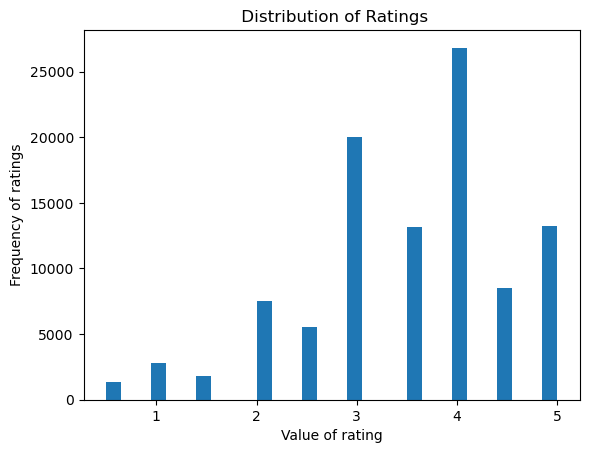

In [36]:
#Frequency of ratings
plt.hist(merged_df['rating'],bins=30)
plt.xlabel('Value of rating')
plt.ylabel('Frequency of ratings')
plt.title(' Distribution of Ratings')
plt.show()

### Top Genres

We extracted individual genres from the movie genres column to investigate the most popular genres.

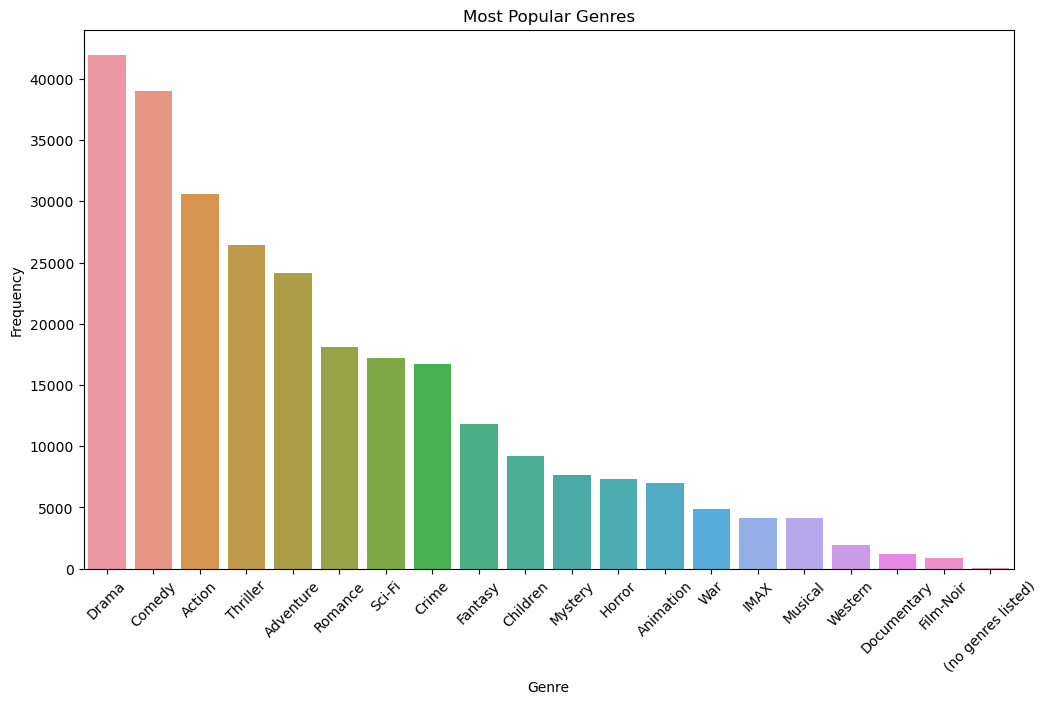

In [37]:
#Extracting genre labels from the genre column
genrelabels = set()
for i in merged_df['genres'].str.split('|').values:
    genrelabels = genrelabels.union(set(i))
    
#Creating a function to visualize genre     
def genrecounts(merged_df, col, labels):
    count = dict()
    for i in labels: count[i] = 0
    for value in merged_df[col].str.split('|'):
        if type(value) == float and pd.isnull(value): continue
        for i in value: 
            if pd.notnull(i): count[i] += 1
    return count    

#Applying the function to our dataframe to extract genre count by genre labels
genre_count = genrecounts(merged_df, 'genres', genrelabels)
genre_count

#Creating a dataframe from the genre labels and frequency
genres = pd.DataFrame(list(genre_count.items()),columns = ['Genre','Frequency'])

#Sorting values by the frequency column
genres = genres.sort_values(by=['Frequency'], ascending=False)

#Visualizing the most popular genres
plt.figure(figsize=(12,7))
sns.barplot(x='Genre', y='Frequency', data=genres)
plt.title('Most Popular Genres')
plt.xticks(rotation=45);

### Top 10 watched movies

In [38]:
top_ten_watched_movies = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)
pd.DataFrame(top_ten_watched_movies.head(10))

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
Star Wars: Episode IV - A New Hope (1977),251
Jurassic Park (1993),238
Braveheart (1995),237
Terminator 2: Judgment Day (1991),224


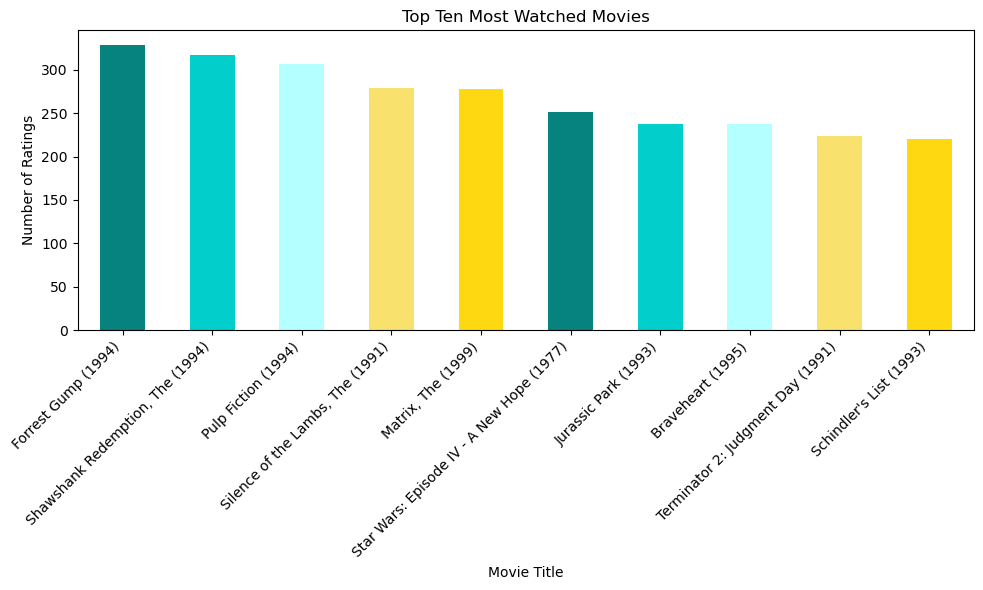

In [39]:
# Step 1: Group data by movie title and count the number of ratings
watch_counts = merged_df['title'].value_counts()

# Step 2: Get the top ten most watched movies
top_ten_watched = watch_counts.head(10)

# Step 3: Plot the histogram
plt.figure(figsize=(10, 6))
top_ten_watched.plot(kind='bar', color=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
plt.title('Top Ten Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 10 Highly Rated Movies

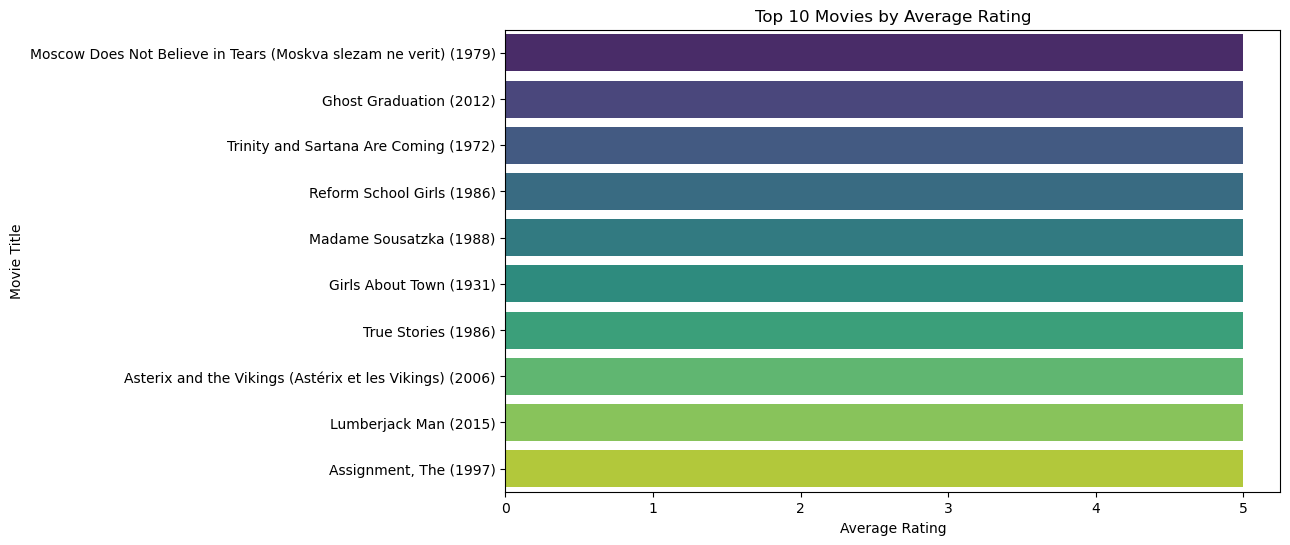

In [40]:
# the average rating for each movie
average_ratings = merged_df.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

## Analysis of Movies with a Mean Rating of and User Rating

In [41]:
# Prompt the user to input a rating value
rating_value = float(input("Enter a rating value: "))

# Step 1: Group data by movie title and calculate mean rating
mean_ratings = merged_df.groupby('title')['rating'].mean()

# Step 2: Filter movies with a mean rating of the chosen value
top_rated_movies = mean_ratings[mean_ratings == rating_value].index.tolist()

# Step 3: Retrieve user ratings for these movies
top_rated_movie_ratings = merged_df[merged_df['title'].isin(top_rated_movies)]

# Calculate the total number of movies with the chosen rating value
num_top_rated_movies = len(top_rated_movies)

# Calculate the total number of users who have given the chosen rating to these movies
num_users_with_chosen_rating = top_rated_movie_ratings[top_rated_movie_ratings['rating'] == rating_value].groupby('title')['userId'].nunique().sum()

# Display the results
print(f"Total number of movies with a mean rating of {rating_value}: {num_top_rated_movies}")
print(f"Total number of users who have given a rating of {rating_value} to these movies: {num_users_with_chosen_rating}")

Enter a rating value:  4


Total number of movies with a mean rating of 4.0: 1005
Total number of users who have given a rating of 4.0 to these movies: 1350


### Movie Release by Decades

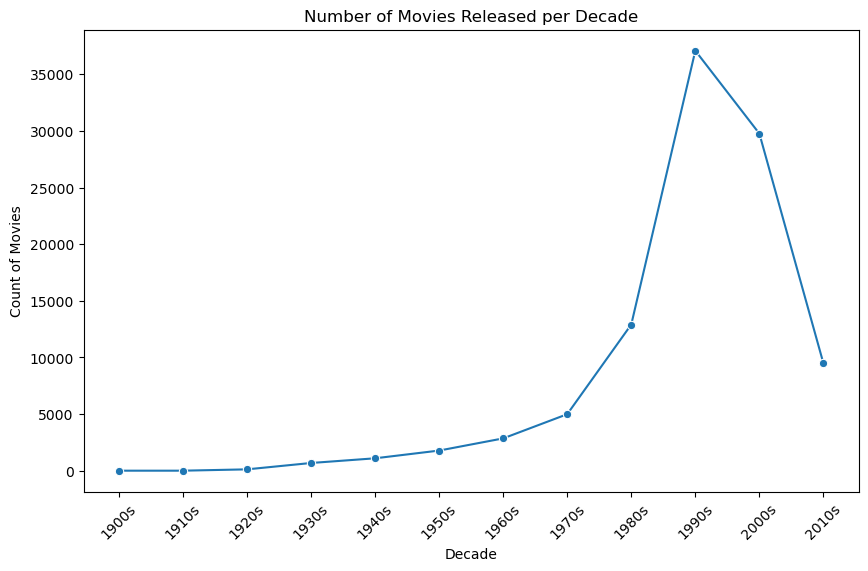

In [42]:
# Grouping by decade and counting the number of movies released
movies_per_decade = merged_df.groupby('decade').size().reset_index(name='count')

# Plotting the counts
plt.figure(figsize=(10, 6))
sns.lineplot(data=movies_per_decade, x='decade', y='count', marker='o')
plt.title('Number of Movies Released per Decade')
plt.xlabel('Decade')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45);


The number of movies produced from the 1900s if fairly low until the 1960s when it begins to rise. Movie production experiences exponentail growth from the 1970s until the highest peak in 1990s after which the number of movies begins to fall. The 2010s decades maybe missing some data as our last movie release date is in 2018.

### Number of Ratings and Average ratings per Decade

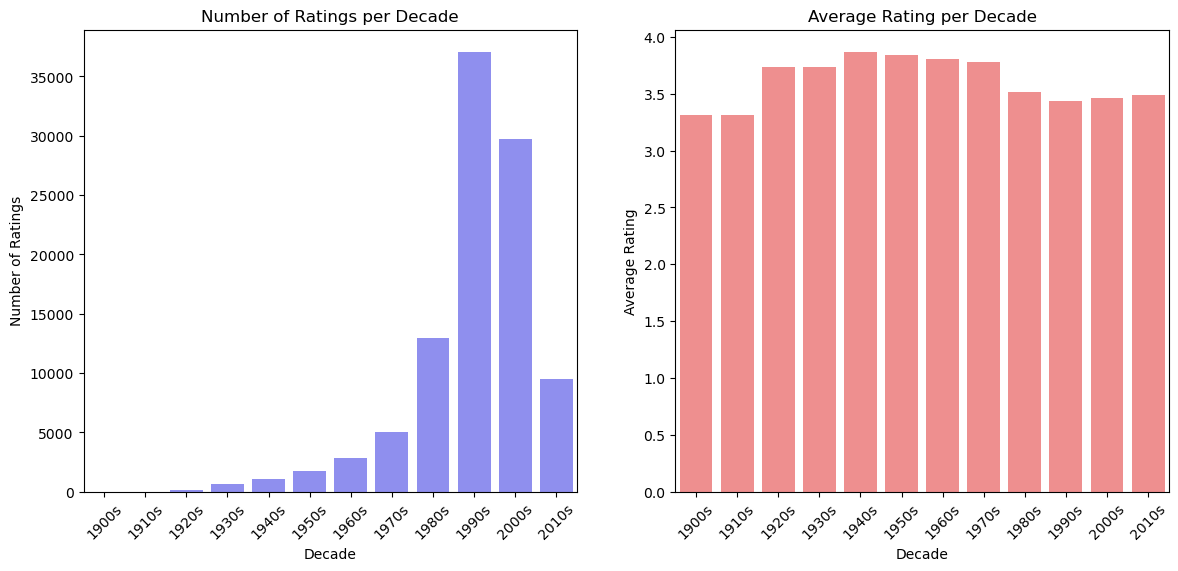

In [43]:
# Grouping by decade and calculating the average rating
ratings_stats = merged_df.groupby('decade').agg({'rating': ['mean', 'count']}).reset_index()
ratings_stats.columns = ['decade', 'average_rating', 'number_of_ratings']

# Creating subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting number of ratings per decade
sns.barplot(ax=axes[0], data=ratings_stats, x='decade', y='number_of_ratings', color='blue', alpha=0.5)
axes[0].set_title('Number of Ratings per Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Number of Ratings')
axes[0].tick_params(axis='x', rotation=45)

# Plotting average rating per decade
sns.barplot(ax=axes[1], data=ratings_stats, x='decade', y='average_rating', color='red', alpha=0.5)
axes[1].set_title('Average Rating per Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Rating')
axes[1].tick_params(axis='x', rotation=45);

There are very few ratings to the movies from the 1900s until 1930s to 1940s when they begin rising steadily and then exponentially in the 1990s. The pattern is somewhat similar to movie release.

The average rating of movies however remains steady over the decades with movies rating averaging between 3 and 4

## DATA MODELING

### Collaborative Filtering

`Memory-Based CF:` The approach that relies on finding similarities between users or items to recommend similar items. It typically involves techniques such as Neighbourhood-based CF, where recommendations are made based on the preferences of similar users or items.

`Model-Based CF:` : This approach utilizes various data mining and machine learning algorithms to predict users' ratings or preferences for unrated items. One example of model-based CF is Principal Component Analysis (PCA), which helps identify the most significant components or features in the data and use them to make predictions.

### Memory-Based Collaborative Filtering

#### User-Item Matrix

In [44]:
# pivot table to transform the merged DataFrame into a user-item matrix
pivot_matrix = merged_df.pivot_table(
    index='userId',        # Rows will be indexed by 'userId'
    columns='title',       # Columns will be indexed by 'title'
    values='rating'        # The values in the matrix will be 'rating'
)

# print the first 10 rows of the `pivot_matrix`
pivot_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


#### Collaborative Filtering using user preference

In [45]:
user_matrix = pivot_matrix.copy()
# For unrated movies, we assume the average rating of the user
user_matrix = user_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Print the first 5 rows of the updated user utility matrix
user_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,...,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.366379,4.000000,4.366379
2,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,...,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276,3.948276
3,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,...,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897,2.435897
4,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,...,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556,3.555556
5,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,...,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364,3.636364


In [46]:
user_corr_matrix = user_matrix.T.corr()
user_corr_matrix
#plt.figure(figsize=(10, 10))
#sns.heatmap(user_corr_matrix, annot=True, cmap='coolwarm')
#plt.show()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.264516e-03,5.525772e-04,0.048419,0.021847,-0.045497,-6.199672e-03,0.047013,1.950985e-02,-8.754088e-03,...,0.018127,-0.017172,-0.015221,-3.705875e-02,-2.912138e-02,0.012016,0.055261,0.075224,-2.571255e-02,0.010949
2,0.001265,1.000000e+00,8.832923e-17,-0.017164,0.021796,-0.021051,-1.111357e-02,-0.048085,6.329331e-16,3.011629e-03,...,-0.050551,-0.031581,-0.001688,-1.710814e-15,-1.198076e-15,0.006226,-0.020504,-0.006001,-6.009100e-02,0.025000
3,0.000553,8.832923e-17,1.000000e+00,-0.011260,-0.031539,0.004800,-2.351801e-16,-0.032471,-4.564439e-16,3.137663e-16,...,-0.004904,-0.016117,0.017749,-7.037567e-16,-1.430628e-03,-0.037289,-0.007789,-0.013001,-6.382353e-16,0.019562
4,0.048419,-1.716402e-02,-1.125978e-02,1.000000,-0.029620,0.013956,5.809139e-02,0.002065,-5.873603e-03,5.159032e-02,...,-0.037687,0.063122,0.027640,-1.378212e-02,4.003747e-02,0.020590,0.014628,-0.037569,-1.788358e-02,-0.000993
5,0.021847,2.179571e-02,-3.153892e-02,-0.029620,1.000000,0.009111,1.011715e-02,-0.012284,1.938099e-16,-3.316512e-02,...,0.015964,0.012427,0.027076,1.246135e-02,-3.627206e-02,0.026319,0.031896,-0.001751,9.382892e-02,-0.000281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.012016,6.225827e-03,-3.728895e-02,0.020590,0.026319,-0.009137,2.832591e-02,0.022277,3.163273e-02,-3.994577e-02,...,0.053683,0.016384,0.098011,6.107833e-02,1.967830e-02,1.000000,0.017927,0.056676,3.842210e-02,0.075494
607,0.055261,-2.050374e-02,-7.789105e-03,0.014628,0.031896,0.045501,3.098070e-02,0.048822,-1.216061e-02,-1.765576e-02,...,0.049059,0.038197,0.049317,2.355180e-03,-2.938114e-02,0.017927,1.000000,0.044514,1.904919e-02,0.021879
608,0.075224,-6.000828e-03,-1.300064e-02,-0.037569,-0.001751,0.021727,2.841409e-02,0.071759,3.278284e-02,-5.199963e-02,...,0.069198,0.051388,0.012801,6.318649e-03,-7.977761e-03,0.056676,0.044514,1.000000,5.071449e-02,0.054581


In [47]:
# Calculate correlations for the target user (e.g., User 4)
target_user_id = 4
user_corr_target = user_corr_matrix[target_user_id]

# Sort the correlations in descending order
user_corr_target_sorted = user_corr_target.sort_values(ascending=False)
user_corr_target_sorted.head()

userId
4      1.000000
75     0.116409
137    0.091699
590    0.087103
391    0.081517
Name: 4, dtype: float64

#### Select Top Similar Users:

Select the top  most similar users based on the sorted correlations. These are the users whose ratings will be used to make recommendations.

In [48]:
def select_top_similar_users(user_corr_target_sorted, target_user_id, k=5):
    # Get the correlation values for the target user
    user_correlations = user_corr_target_sorted

    # Sort the correlations in descending order
    sorted_correlations = user_correlations.sort_index(ascending=False)

    # Exclude the target user (if present) from the list of similar users
    similar_users = user_correlations.drop(target_user_id)

    # Select the top k most similar users
    top_similar_users = similar_users.head(k)

    # Return the indices or IDs of the top similar users
    return top_similar_users.index.tolist()

top_similar_users = select_top_similar_users(user_corr_matrix, target_user_id, k=5)
print("Top 5 Similar Users for User", target_user_id, ":")
print(top_similar_users)

Top 5 Similar Users for User 4 :
[1, 2, 3, 5, 6]


In [49]:
def predict_movie_ratings(user_matrix, user_corr_matrix, target_user_id, top_similar_users):
    predicted_ratings = {}
    for movie_id in user_matrix.columns:
        weighted_sum = 0
        sum_similarity = 0
        for similar_user_id in top_similar_users:
            if not pd.isnull(user_matrix.loc[similar_user_id, movie_id]):  # If the similar user has rated the movie
                similarity = user_corr_matrix.loc[target_user_id, similar_user_id]
                rating = user_matrix.loc[similar_user_id, movie_id]
                weighted_sum += similarity * rating
                sum_similarity += similarity
        if sum_similarity != 0:
            predicted_rating = weighted_sum / sum_similarity
        else:
            predicted_rating = 0
        predicted_ratings[movie_id] = predicted_rating
    return predicted_ratings


#### Recommend Top Movies

In [50]:
def recommend_top_movies(predicted_ratings, n=5):
    top_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:n]
    return top_movies

#### In useage with User 4

Use the recommend_top_movies function to recommend movies for any user.

In [51]:
predicted_ratings = predict_movie_ratings(user_matrix, user_corr_matrix, target_user_id, top_similar_users)
top_movie_recommendations = recommend_top_movies(predicted_ratings, n=5)
print("Top 5 Movie Recommendations for User", target_user_id, ":")
for movie_id, predicted_rating in top_movie_recommendations:
    print(f"{movie_id}: {predicted_rating:.2f}")

Top 5 Movie Recommendations for User 4 :
Legends of the Fall (1994): 29.66
Shawshank Redemption, The (1994): 26.19
True Lies (1994): 26.04
Bambi (1942): 25.34
Rescuers, The (1977): 25.34


### Item-Based Recommendation:

Item-based recommendation, also known as item-item collaborative filtering, is a technique used in recommender systems to suggest items to users based on the similarity between items. 

In [52]:
if 'Pulp Fiction (1994)' in pivot_matrix.columns:
    pulp_fiction_ratings = pivot_matrix[['Pulp Fiction (1994)']].mean()
    num_users_rated = pivot_matrix['Pulp Fiction (1994)'].sum()
    print("Mean Ratings for 'Pulp Fiction (1994)':")
    print(pulp_fiction_ratings)
    print(f"Number of users who rated 'Pulp Fiction (1994)': {num_users_rated}")
else:
    print("The column 'Pulp Fiction (1994)' is not present in the DataFrame.")

Mean Ratings for 'Pulp Fiction (1994)':
title
Pulp Fiction (1994)    4.197068
dtype: float64
Number of users who rated 'Pulp Fiction (1994)': 1288.5


In [53]:
# Make a copy of the original utility matrix
item_utility_matrix = pivot_matrix.copy()

# Display the first 10 rows of the item utility matrix
item_utility_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [54]:
def fill_missing_with_column_means(dataframe):
    """
    Fill missing (NaN) values in a DataFrame column-wise with the corresponding column's mean.
        
    Returns:
        pd.DataFrame: The DataFrame with missing values filled using column means.
    """
    # Fill missing values in each column with the column mean
    filled_dataframe = dataframe.apply(lambda col: col.fillna(col.mean()), axis=0)
    
    return filled_dataframe

# call the function
item_matrix_filled = fill_missing_with_column_means(item_utility_matrix)
item_matrix_filled.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


In [55]:
item_matrix_corr = item_matrix_filled.corr()
item_matrix_corr.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,1.0,NaN,-2.470228e-17,NaN,-6.783236e-16,-4.090781e-16,...,NaN,1.491400e-15,-2.970631e-18,NaN,NaN,-1.174172e-16,-4.643126e-16,-1.457468e-15,2.901144e-15,NaN


In [56]:
## correlation values for 'Pulp Fiction (1994)' from the correlation matrix
pulp_fiction_corr = item_matrix_corr['Pulp Fiction (1994)']

# Sort the correlations in descending order
pulp_fiction_corr= pulp_fiction_corr.sort_values(ascending=False)

# Drop NAN values
pulp_fiction_corr = pulp_fiction_corr.dropna()

pulp_fiction_corr.head()

title
Pulp Fiction (1994)                            1.000000
Fight Club (1999)                              0.279334
Seven Samurai (Shichinin no samurai) (1954)    0.226609
Usual Suspects, The (1995)                     0.205534
Silence of the Lambs, The (1991)               0.197072
Name: Pulp Fiction (1994), dtype: float64

In [57]:
# We put the above data in a dataframe
similar_to_pulp = pd.DataFrame(data = pulp_fiction_corr.values, columns=['correlation'],
                              index = pulp_fiction_corr.index)

# remove Pulp 'Fiction 1994'
similar_to_pulp = similar_to_pulp[1:]
similar_to_pulp.head()

,correlation
title,
Fight Club (1999),0.279334
Seven Samurai (Shichinin no samurai) (1954),0.226609
"Usual Suspects, The (1995)",0.205534
"Silence of the Lambs, The (1991)",0.197072
East is East (1999),0.193432


#### Prediction Using Item Based Collaborative Filtering

In [58]:
def get_top_5_recommendations(user_ratings, item_matrix_corr):
    # correlations between user's ratings and all other movies
    user_corr = item_matrix_corr[user_ratings.index].sum(axis=1)
    
    # DataFrame to store correlation values and total ratings
    user_similar_movies = pd.DataFrame(data=user_corr, columns=['Correlation'])
    
    # Filter out movies the user has already rated
    user_similar_movies = user_similar_movies.drop(user_ratings.index, errors='ignore')
    
    # Sort by correlation in descending order
    user_similar_movies = user_similar_movies.sort_values(by=['Correlation'], ascending=False)
    
    # Get the top 5 recommendations
    top_recommendations = user_similar_movies.head(5)
    
    return top_recommendations

# Example usage:
user_ratings = pd.Series({'Pulp Fiction (1994)': 5.0}, {'Poltergeist (1982)': 4.0})
top_5_recommendations = get_top_5_recommendations(user_ratings, item_matrix_corr)
print(top_5_recommendations)

                          Correlation
title                                
Terminator, The (1984)       0.341512
Patriot, The (2000)          0.310142
Dirty Harry (1971)           0.301141
Little Black Book (2004)     0.279448
Flatliners (1990)            0.272172


### Model-Based Collaborative Filtering

### KNN Basic

In [59]:
#Creating a new df for the columns relevant in modeling
df_model_kNN = merged_df[['userId', 'movieId', 'rating']]

In [60]:
# Instantiating the reader 
reader = Reader(rating_scale=(0, 5))

#Loading the data into a Surprise Dataset
data_kNN = Dataset.load_from_df(df_model_kNN, reader) 

In [61]:
#Splittting the data into a train and test set with train_test_split
trainset, testset = train_test_split(data_kNN, test_size=0.2, random_state=42)

#Printing out the number of users and items to determine which to use
print('Number of users in train set : ', trainset.n_users, '\n')
print('Number of items in train set : ', trainset.n_items, '\n')

Number of users in train set :  610 

Number of items in train set :  8952 



In [62]:
#Instantiating the Baseline Model
knn_basic = KNNBasic(random_state=42)

# Train the model on the trainset
knn_basic.fit(trainset)

# Make predictions on the testset
knnbasic_test_preds = knn_basic.test(testset)

#Evaluating on Training Set
knnbasic_train_preds = knn_basic.test(trainset.build_testset())
print("Training RMSE:", accuracy.rmse(knnbasic_train_preds))
print("Training MAE:", accuracy.mae(knnbasic_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(knnbasic_test_preds))
print("Test MAE:", accuracy.mae(knnbasic_test_preds))


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7121
Training RMSE: 0.7121319921935311
MAE:  0.5324
Training MAE: 0.5324126461742702
RMSE: 0.9487
Test RMSE: 0.9487267734253846
MAE:  0.7257
Test MAE: 0.7257463319534154


Our baseline model gave us a train RMSE and MAE of 0.7121 and 0.5324 respectively and a test RMSE and MAE of 0.9487 and 0.7257.

We proceeded to tune our baseline model and also test other models to get the one with the lowest RMSE and MAE.

In [63]:
#Instantiating the Improved Model with Specified Parameters
sim_options = {'name': 'pearson', 'user_based': True} 

knn_basic_params = KNNBasic(sim_options=sim_options, random_state=42)

# Train the model on the trainset
knn_basic_params.fit(trainset)

# Make predictions on the testset
knnbasic_params_test_preds = knn_basic_params.test(testset)

#Evaluating on Training Set
knnbasic_params_train_preds = knn_basic_params.test(trainset.build_testset())
print("Training RMSE:", accuracy.rmse(knnbasic_params_train_preds))
print("Training MAE:", accuracy.mae(knnbasic_params_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(knnbasic_params_test_preds))
print("Test MAE:", accuracy.mae(knnbasic_params_test_preds))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6602
Training RMSE: 0.6601625729468124
MAE:  0.4941
Training MAE: 0.49412974580189395
RMSE: 0.9733
Test RMSE: 0.9733443129115866
MAE:  0.7499
Test MAE: 0.7499124664270276


We tuned our baseline model by specifying parameters. This model gave us a train RMSE and MAE of 0.6602 and 0.4941 respectively and a test RMSE and MAE of 0.9733 and 0.7499 respectively. While this model trained slightly better than our baseline model recording slight improvement in the RMSE and MAE, the testset results were worse than our previous baseline model. we proceeded to crossvalidate our model. 

In [64]:
# Initialize the KNNBasic model
sim_options = {'name': 'cosine', 'user_based': True}  
cv_knn_basic = KNNBasic(sim_options=sim_options)

# Perform cross-validation
cv_results = cross_validate(cv_knn_basic, data_kNN, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the cross-validation results
print("Cross-validation Results:")
for measure in ['test_rmse', 'test_mae']:
    print(f"{measure}: {cv_results[measure].mean()}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9721  0.9678  0.9727  0.9712  0.9667  0.9701  0.0024  
MAE (testset)     0.7477  0.7465  0.7486  0.7468  0.7460  0.7471  0.0009  
Fit time          0.28    0.29    0.31    0.32    0.30    0.30    0.01    
Test time         0.76    0.80    0.82    0.79    1.21    0.87    0.17    
Cross-validation Results:
test_rmse: 0.970078745138456
test_mae: 0.7471146599612519


Crossvalidating our model gave us a test RMSE and MAE of 0.9700 and 0.7471 respectively which wasn't any better than our previous 2 models.
We used GridSearch to get the best parameters for the KNN basic model

In [65]:
#Defining the parameter grid
#knn_params = {'name': ['cosine', 'pearson'],
#              'user_based':[True, False], 
#              'min_support':[True, False],
#            'min_k' : [1, 2]}

#Applying Gridsearch to look for the best parameters
#gsknnbasic = GridSearchCV(KNNBasic, knn_params, measures=['rmse', 'mae'], cv=3)
#gsknnbasic.fit(data)

In [66]:
#Getting the best parameters and score from GridSearch
#print(gsknnbasic.best_score)
#print(gsknnbasic.best_params)

{'name': 'cosine', 'user_based': True, 'min_support':True, 'min_k':2, }

### Tuned KNN Basic (Grid Search)

In [67]:
#Tuning the KNN Basic model using the GridSearch best parameters
knn_basic_tuned = KNNBasic(sim_options={'name': 'cosine', 
                                       'user_based': True, 
                                       'min_support':True, 
                                       'min_k':2, })
#Fitting the model and predicting
knn_basic_tuned.fit(trainset)
knnbasic_tuned_test_preds = knn_basic_tuned.test(testset)

#Evaluating on Training Set
knnbasic_tuned_train_preds = knn_basic_tuned.test(trainset.build_testset())
print("Training RMSE:", accuracy.rmse(knnbasic_tuned_train_preds))
print("Training MAE:", accuracy.mae(knnbasic_tuned_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(knnbasic_tuned_test_preds))
print("Test MAE:", accuracy.mae(knnbasic_tuned_test_preds))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8365
Training RMSE: 0.8365126364717682
MAE:  0.6320
Training MAE: 0.6320377767689631
RMSE: 0.9745
Test RMSE: 0.9744600140480167
MAE:  0.7497
Test MAE: 0.7496670974109582


Using the best parameters generated by GridSearch, we got a a train RMSE and MAE of 0.8365 and 0.6320 respectively and a test RMSE and MAE of 0.9745 and 0.7497   respectively. This model did not perform any better than our previous models and was infact poorer in training.

### KNN Baseline

We proceeded to fit a KNNBaseline model:

In [68]:
#Instantiating the Model with Specified Parameters
sim_options = {'name': 'cosine', 'user_based': True}
knn_baseline = KNNBaseline(sim_options=sim_options)

# Train the model on the trainset
knn_baseline.fit(trainset)

# Make predictions on the testset
knnbase_test_preds = knn_baseline.test(testset)

#Evaluating on Training Set
knnbase_train_preds = knn_baseline.test(trainset.build_testset())
print("Training RMSE:", accuracy.rmse(knnbase_train_preds))
print("Training MAE:", accuracy.mae(knnbase_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(knnbase_test_preds))
print("Test MAE:", accuracy.mae(knnbase_test_preds))


Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7510
Training RMSE: 0.750967373127724
MAE:  0.5619
Training MAE: 0.5618852716261583
RMSE: 0.8821
Test RMSE: 0.8821144714454775
MAE:  0.6739
Test MAE: 0.6738662584448811


The KNNBaseline model gave us a train RMSE and MAE of 0.7510 and 0.5619 respectively and a test RMSE and MAE of 0.8821 and 0.6739 respectively. This was an improvement from the previous models we had fitted.

In [69]:
# Crossvalidating using the KNNBaseline model
sim_options = {'name': 'cosine', 'user_based': True}  
cv_knn_baseline = KNNBaseline(sim_options=sim_options)

# Perform cross-validation
cv_baseline_results = cross_validate(cv_knn_baseline, data_kNN, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the cross-validation results
print("Cross-validation Results:")
for measure in ['test_rmse', 'test_mae']:
    print(f"{measure}: {cv_baseline_results[measure].mean()}")

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8793  0.8813  0.8782  0.8746  0.8775  0.8782  0.0022  
MAE (testset)     0.6724  0.6759  0.6724  0.6687  0.6708  0.6720  0.0023  
Fit time          0.41    0.45    0.44    0.45    0.55    0.46    0.05    
Test time         0.93    1.00    0.97    1.20    0.98    1.02    0.10    
Cross-validation Results:
te

Crossvalidating the KNN baseline model gave us a test RMSE of  0.8782 and a test MAE of 0.6720. This was a very slight improvement from the KNNBaseline model.



### Tuned KNN Baseline (Grid Search)

We performed a GridSearch to find the best parameters to fit the model and fitted the same KNNBaseline model using these best parameters.

In [70]:
#Applying Gridsearch to look for the best parameters
#gsknnbaseline = GridSearchCV(KNNBaseline, knn_params, measures=['rmse', 'mae'], cv=3)
#gsknnbaseline.fit(data)

In [71]:
#Getting the best parameters and score from GridSearch
#print(gsknnbaseline.best_score)
#print(gsknnbaseline.best_params)

In [72]:
#Tuning the KNN Baseline model using the GridSearch best parameters
knn_baseline_tuned = KNNBaseline(sim_options={'name': 'cosine', 
                                       'user_based': True, 
                                       'min_support':True, 
                                       'min_k':2, })
#Fitting the model and predicting
knn_baseline_tuned.fit(trainset)
knnbase_tuned_test_preds = knn_baseline_tuned.test(testset)

#Evaluating on Training Set
knnbase_tuned_train_preds = knn_baseline_tuned.test(trainset.build_testset())
print("Training RMSE:", accuracy.rmse(knnbase_tuned_train_preds))
print("Training MAE:", accuracy.mae(knnbase_tuned_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(knnbase_tuned_test_preds))
print("Test MAE:", accuracy.mae(knnbase_tuned_test_preds))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.7510
Training RMSE: 0.750967373127724
MAE:  0.5619
Training MAE: 0.5618852716261583
RMSE: 0.8821
Test RMSE: 0.8821144714454775
MAE:  0.6739
Test MAE: 0.6738662584448811


The KNNBaseline model using the best parameters gave a train RMSE and MAE of 0.7510 and 0.5619 respectively and a test RMSE and MAE of 0.8821 and 0.6739 respectively. This meant that tuning the model using GridSearch's best parameters made no difference

### Singular Value Decomposition (SVD Model)

In [73]:
## Create a new datafram svd_df
svd_df = pd.DataFrame({
    'userId': merged_df['userId'],        # Rows will be indexed by 'userId'
    'movieId': merged_df['movieId'],      # Columns will be indexed by 'movieId'
    'rating': merged_df['rating']
})
svd_df.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [74]:
#Transform the dataset into something more compatible with #surprise'
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.0, 5.0))
data = Dataset.load_from_df(svd_df, reader)
print(data)

In [75]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9700


In [76]:
# Set random state for reproducibility
random.seed(42)

# Initialize the SVD algorithm 
svd = SVD(random_state=42)

# Perform cross-validation with 5 folds (you can adjust the 'cv' parameter)
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the cross-validation results
for metric in ['test_rmse', 'test_mae']:
    print(f'{metric}: {results[metric].mean()}')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8809  0.8709  0.8728  0.8795  0.8680  0.8744  0.0050  
MAE (testset)     0.6770  0.6709  0.6708  0.6736  0.6675  0.6720  0.0032  
Fit time          1.01    0.96    0.97    0.97    0.98    0.98    0.02    
Test time         0.11    0.08    0.08    0.09    0.09    0.09    0.01    
test_rmse: 0.8743970465749238
test_mae: 0.6719597903381327


Crossvalidating the SVD model gave us a test RMSE of 0.8734 and a test MAE of 0.6705. 

In [77]:
# Define the parameter grid for SVD
#params = {'n_factors': [130, 150, 170],   # Number of factors
#          'n_epochs': [50, 70, 90],       # Number of iterarations
#          'lr_all': [0.01, 0.02, 0.03],
#          'reg_all': [0.02, 0.05, 0.1]}  # Regularization term
#g_s_svd = GridSearchCV(SVD,param_grid=params,cv=5,n_jobs=-1)
#g_s_svd.fit(data)

In [78]:
# print out optimal parameters for SVD after GridSearch
#print(g_s_svd.best_score)
#print(g_s_svd.best_params)

{'rmse': 0.8473060943362647, 'mae': 0.6490619889678235}

{'rmse': {'n_factors': 150, 'n_epochs': 90, 'lr_all': 0.01, 'reg_all': 0.1}, 'mae': {'n_factors': 150, 'n_epochs': 90, 'lr_all': 0.01, 'reg_all': 0.1}}

#### Handling Sparsity

One of the observations during data exploration was that our matrix was very sparse. Even though the singular vector decomposition model handled the sparsity, the errors were not reducing significantly. We decided to handle the sparsity to see if it would improve our models any further. 

Our first approach was to reduce sparsity by dropping the data points with a lot of null values. To this effect, we filtered out all the movies where there were less than 200 ratings and all the users that had rated less than 20 movies. 

In [79]:
df_sparse = svd_df.copy()

In [80]:
#Checking the Sparsity
numratings = len(df_sparse['rating'])
numusers = len(df_sparse['userId'].unique())
numitems = len(df_sparse['movieId'].unique())

sparse = 1 - (numratings / (numusers*numitems))
sparse

0.9829634950143654

In [81]:
#Reducing the sparsity

df_sparse = df_sparse.groupby('userId').filter(lambda x: len(x)>200)

In [82]:
df_sparse = df_sparse.groupby('movieId').filter(lambda x: len(x)>10)

In [83]:
svd_df.shape

(100805, 3)

In [84]:
df_sparse.shape

(47232, 3)

In [85]:
numratings = len(df_sparse['rating'])
numusers = len(df_sparse['userId'].unique())
numitems = len(df_sparse['movieId'].unique())

sparse = 1 - (numratings / (numusers*numitems))
sparse

0.7931695867508024

In [86]:
# Load the data into Surprise using Bayesian average ratings
reader = Reader(rating_scale=(0, 5))
sparse_data = Dataset.load_from_df(df_sparse[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
sparse_trainset, sparse_testset = train_test_split(sparse_data, test_size=0.2, random_state=42)

# Train the model using SVD
sparse_model = SVD(n_factors = 150, n_epochs = 90, lr_all = 0.01, reg_all = 0.1)

sparse_model.fit(sparse_trainset)

# Test the model
sparse_predictions = sparse_model.test(sparse_testset)

#Evaluating on Training Set
sparse_train_preds = sparse_model.test(sparse_trainset.build_testset())
print("Training RMSE:", accuracy.rmse(sparse_train_preds))
print("Training MAE:", accuracy.mae(sparse_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(sparse_predictions))
print("Test MAE:", accuracy.mae(sparse_predictions))


RMSE: 0.4998
Training RMSE: 0.4997759262835608
MAE:  0.3886
Training MAE: 0.3886217869855882
RMSE: 0.7912
Test RMSE: 0.7912387261373932
MAE:  0.6046
Test MAE: 0.6046459541399023


Filtering the data reduced sparsity from 0.98 to 0.79. The train RMSE and MAE were 0.4998 and 0.3887 respectively and the test RMSE and MAE were 0.7912 and 0.6046 respectively. **This model trained better than our previous SVD model but it led to loss of more than 50% of the data** 

### Bayesian SVD Model

In [87]:
#Creating a copy of dataframe to use 
df_bayes = svd_df.copy()

In [88]:
df_bayes.shape

(100805, 3)

In [89]:
# Calculate Bayesian average ratings
def bayesian_average(ratings):
    return (ratings.mean() * ratings.count() + 2.5 * 5) / (ratings.count() + 5)

# Apply Bayesian average ratings to the DataFrame
df_bayes['bayesian_avg'] = df_bayes.groupby('movieId')['rating'].transform(bayesian_average)

# Load the data into Surprise using Bayesian average ratings
reader = Reader(rating_scale=(0, 5))
bayes_data = Dataset.load_from_df(df_bayes[['userId', 'movieId', 'bayesian_avg']], reader)

# Split the data into train and test sets
bayes_trainset, bayes_testset = train_test_split(bayes_data, test_size=0.2, random_state=42)

# Train the model using SVD
model = SVD()
model.fit(bayes_trainset)

# Test the model
bayes_predictions = model.test(bayes_testset)

#Evaluating on Training Set
bayes_train_preds = model.test(bayes_trainset.build_testset())
print("Training RMSE:", accuracy.rmse(bayes_train_preds))
print("Training MAE:", accuracy.mae(bayes_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(bayes_predictions))
print("Test MAE:", accuracy.mae(bayes_predictions))

RMSE: 0.1537
Training RMSE: 0.15370903684367265
MAE:  0.1045
Training MAE: 0.10448020516256228
RMSE: 0.1882
Test RMSE: 0.18824378648222703
MAE:  0.1277
Test MAE: 0.127673684109327


Fitting an SVD model with the Bayesian average ratings improved the model significantly reducing the training RMSE and MAE to 0.1537 and 0.1045 respectively and the test RMSE and MAE to 0.1882 and 0.1277 respectively.

We then fitted a tuned SVD model using the Bayesian average ratings.

In [90]:
#Tuning the svd model with bayesian averages to 
tuned_bayes_model = SVD(n_factors=150, reg_all=0.1, n_epochs=90, lr_all=0.01)
tuned_bayes_model.fit(bayes_trainset)

# Testing the model
tuned_bayes_preds = tuned_bayes_model.test(bayes_testset)

#Evaluating on Training Set
tuned_bayes_train_preds = tuned_bayes_model.test(bayes_trainset.build_testset())
print("Training RMSE:", accuracy.rmse(tuned_bayes_train_preds))
print("Training MAE:", accuracy.mae(tuned_bayes_train_preds))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(tuned_bayes_preds))
print("Test MAE:", accuracy.mae(tuned_bayes_preds))


RMSE: 0.0831
Training RMSE: 0.08308301313129783
MAE:  0.0581
Training MAE: 0.05806728212457226
RMSE: 0.1452
Test RMSE: 0.14523305122172525
MAE:  0.0774
Test MAE: 0.07741795988109157


The tuned SVD model with Bayesian Average ratings had the best outcome with the following values after evaluation:

- Training RMSE:0.0831
- Test RMSE: 0.1452
- Training MAE:0.0581
- Test MAE:0.0774

The model did not also show signs of overfitting as the training and test set errors were very close.

### Predicition with SVD

In [91]:
# User ID for which you want to make recommendations
user_Id = 4

# Get a list of all movie IDs in your dataset
all_movie_ids = np.unique(svd_df['movieId'])

# Create a list to store predicted ratings for unrated movies
ratings = []

# Predict ratings for the user on unrated movies
for movie_id in all_movie_ids:
    # Check if the user has already rated the movie
    if not svd_df[(svd_df['userId'] == user_Id) & (svd_df['movieId'] == movie_id)].empty:
        continue  # Skip if the user has rated the movie

    predicted_rating = tuned_bayes_model.predict(user_Id, movie_id)
    ratings.append((movie_id, predicted_rating.est))

# Sort the predicted ratings in descending order
ratings.sort(key=lambda x: x[1], reverse=True)

# Top 5 movie recommendations
top_5_recommendations = ratings[:5]

# Display the top 5 recommended movies
for movie_id, predicted_rating in top_5_recommendations:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Predicted Rating: {predicted_rating:.2f}")


Movie: Shawshank Redemption, The (1994), Predicted Rating: 4.29
Movie: Godfather, The (1972), Predicted Rating: 4.16
Movie: Godfather: Part II, The (1974), Predicted Rating: 4.11
Movie: Usual Suspects, The (1995), Predicted Rating: 4.11
Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Predicted Rating: 4.10


**The top 5 movie recommendations for User 4 are as follows:**
1. Movie: Shawshank Redemption, The (1994), Predicted Rating: 4.29
2. Movie: Godfather, The (1972), Predicted Rating: 4.16
3. Movie: Godfather: Part II, The (1974), Predicted Rating: 4.11
4. Movie: Usual Suspects, The (1995), Predicted Rating: 4.11
5. Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Predicted Rating: 4.10: 4.47


## Non-Negative Matrix Factorization (NMF Model)

In [92]:
## Create a new datafram svd_df
nmf_df = pd.DataFrame({
    'userId': merged_df['userId'],        # Rows will be indexed by 'userId'
    'movieId': merged_df['movieId'],      # Columns will be indexed by 'movieId'
    'rating': merged_df['rating']
})
nmf_df.head()

,userId,movieId,rating
0,1,1,4.0
1,5,1,4.0
2,7,1,4.5
3,15,1,2.5
4,17,1,4.5


In [93]:
#Transform the dataset into something more compatible with #surprise'
from surprise import Reader, Dataset

reader = Reader(rating_scale=(0.0, 5.0))
data_nmf = Dataset.load_from_df(nmf_df, reader)
print(data_nmf)

In [94]:
nmfset = data_nmf.build_full_trainset()  # Build the full training set

In [95]:
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import NMF
from sklearn.model_selection import train_test_split

### Basic NMF Model

In [96]:
# Set random state for reproducibility
random.seed(42)

nmf = NMF(random_state=42,n_factors=50, n_epochs=100, biased=False)
cross_validate(algo=nmf, data=data_nmf, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9022  0.9029  0.9074  0.9048  0.8982  0.9031  0.0030  
Fit time          6.50    6.97    7.57    7.77    7.24    7.21    0.45    
Test time         0.07    0.09    0.10    0.10    0.09    0.09    0.01    


{'test_rmse': array([0.90215673, 0.90294697, 0.90744661, 0.90476404, 0.89822345]),
 'fit_time': (6.501619100570679,
  6.967777967453003,
  7.566532850265503,
  7.772785425186157,
  7.241774320602417),
 'test_time': (0.07314419746398926,
  0.09496927261352539,
  0.10104966163635254,
  0.10424518585205078,
  0.08954906463623047)}

###  Tuned NMF Model (Grid Search)

In [97]:
#from surprise.model_selection import GridSearchCV

# Define a parameter grid to search
#param_grid = {
#    'n_factors': [10, 15, 20],
#    'n_epochs': [20, 30, 50],
#    'lr_bu': [0.005, 0.01],  # Learning rate for user biases
#    'lr_bi': [0.005, 0.01],  # Learning rate for item biases
#    'reg_pu': [0.1, 0.15],   # Regularization term for user latent factors
#    'reg_qi': [0.1, 0.15]    # Regularization term for item latent factors
#}

# Perform grid search with cross-validation
#gs = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)
#gs.fit(data_nmf)

# Best RMSE score
#print("Best RMSE score attained:", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
#print("Parameters for best RMSE score:", gs.best_params['rmse'])

Best RMSE score attained: 0.9059853841737464.

Parameters for best RMSE score: {'n_factors': 20, 'n_epochs': 20, 'lr_bu': 0.01, 'lr_bi': 0.01, 'reg_pu': 0.15, 'reg_qi': 0.15}

In [98]:
#Tuning the nmf model 
tuned_model = NMF(n_factors=20, n_epochs=20, lr_bu = 0.01, lr_bi = 0.005, reg_pu = 0.15, reg_qi = 0.15)

# Build the full training set
trainset = data_nmf.build_full_trainset()

# Fit the NMF model
tuned_model.fit(trainset)

# Make predictions for the test set
predictions = tuned_model.test(testset)

# Evaluate on Train Set
print("Training RMSE:", accuracy.rmse(predictions))
print("Training MAE:", accuracy.mae(predictions))

#Evaluating on Test Set
print("Test RMSE:", accuracy.rmse(predictions))
print("Test MAE:", accuracy.mae(predictions))


RMSE: 0.7204
Training RMSE: 0.7203792855745096
MAE:  0.5327
Training MAE: 0.532655765792084
RMSE: 0.7204
Test RMSE: 0.7203792855745096
MAE:  0.5327
Test MAE: 0.532655765792084


The tuned NMF improved on the basic NMF model with lower error on both the RMSE (0.7204) and MAE(0.5327). However it does not provide a better performance than the bayesian SVD. 

### Prediction with NMF Model

In [99]:
# Make predictions for a specific user
user_id = 4
user_movies = nmf_df[nmf_df['userId'] == user_id]['movieId'].unique()
unrated_movies = [movie_id for movie_id in nmf_df['movieId'].unique() if movie_id not in user_movies]

# Make predictions for unrated movies
predictions = {movie_id: nmf.predict(user_id, movie_id).est for movie_id in unrated_movies}

# Sort predictions by estimated rating (descending order)
sorted_predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 movie recommendations with predicted ratings
top_5_recommendations = sorted_predictions[:5]

# Print the top 5 movie recommendations for the user with predicted ratings
print(f"The top 5 movie recommendations for User {user_id} with predicted ratings are as follows:")
for i, (movie_id, predicted_rating) in enumerate(top_5_recommendations, 1):
    movie_title = movies_df.loc[movies_df['movieId'] == movie_id, 'title'].values[0]
    print(f"{i}. {movie_title} (ID: {movie_id}), Predicted Rating: {predicted_rating:.2f}")


The top 5 movie recommendations for User 4 with predicted ratings are as follows:
1. The Artist (2011) (ID: 89904), Predicted Rating: 4.97
2. All About Eve (1950) (ID: 926), Predicted Rating: 4.86
3. Evil Dead II (Dead by Dawn) (1987) (ID: 1261), Predicted Rating: 4.79
4. You Don't Mess with the Zohan (2008) (ID: 59900), Predicted Rating: 4.73
5. Sense and Sensibility (1995) (ID: 17), Predicted Rating: 4.72


## Addressing the Cold Start Problem (CSP Model)

For new users, a possible approach is to recommend popular or highly-rated movies from genres that are broadly appealing or trending.

For new items, leveraging item metadata (like genres) to find similar items based on content similarity can be effective.

Implementing a Basic Solution for New Users:

In [100]:
def recommend_for_new_user(df, num_recommendations=5):
    """
    Recommend top N highly-rated movies for new users based on genres.
    """
    
    popular_movies = df.groupby(['title', 'genres'])['rating'].mean().reset_index()
    # Apply Bayesian average ratings to the DataFrame
    popular_movies['bayesian_avg'] = popular_movies.groupby('title')['rating'].transform(bayesian_average)
    popular_movies = popular_movies.sort_values(by='bayesian_avg', ascending=False)
    
    
    return popular_movies.head(num_recommendations)

# Example usage:
new_user_recommendations = recommend_for_new_user(merged_df)
print("Recommendations for a new user:\n", new_user_recommendations)

Recommendations for a new user:
                                            title  \
7027                  Reform School Girls (1986)   
5428                         Maniac Cop 2 (1990)   
3366  George Carlin: Life Is Worth Losing (2005)   
3365   George Carlin: Jammin' in New York (1992)   
714                      Babes in Toyland (1934)   

                               genres  rating  bayesian_avg  
7027                     Action|Drama     5.0      2.916667  
5428           Action|Horror|Thriller     5.0      2.916667  
3366                           Comedy     5.0      2.916667  
3365                           Comedy     5.0      2.916667  
714   Children|Comedy|Fantasy|Musical     5.0      2.916667  


In [103]:
# The 'annoy' library is used for Approximate Nearest Neighbors (ANN) search. 
#This is a technique used in information retrieval to find approximate matches for a given query. 
#This is particularly useful when dealing with high-dimensional data  where exact nearest neighbor search can be computationally expensive.
from sklearn.feature_extraction.text import TfidfVectorizer
import annoy
import numpy as np

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(merged_df['genres'])

# Get the number of features (vocabulary size)
n_features = tfidf_matrix.shape[1]

# Create Annoy index
annoy_index = annoy.AnnoyIndex(n_features, metric='angular')

# Add items to the Annoy index
for idx, vector in enumerate(tfidf_matrix):
    annoy_index.add_item(idx, vector.toarray().ravel())  # Convert sparse matrix to dense array

# Build the Annoy index
annoy_index.build(10)


# Function to recommend similar movies for a new movie
def recommend_similar_movies(new_movie_genres, annoy_index=annoy_index, merged_df=merged_df, num_recommendations=5):
    # Compute TF-IDF vector for the new movie genres
    new_movie_tfidf = tfidf.transform([new_movie_genres])

    # Get nearest neighbors using Annoy index
    sim_indices = annoy_index.get_nns_by_vector(new_movie_tfidf.toarray().ravel(), num_recommendations + 1)  # Fetch one extra recommendation

    # Filter out the index of the new movie
    new_movie_index = merged_df[merged_df['genres'] == new_movie_genres].index.tolist()[0]
    if new_movie_index in sim_indices:
        sim_indices.remove(new_movie_index)

    # Retrieve recommended movie titles
    recommended_titles = merged_df.iloc[sim_indices]['title'].tolist()

    # Keep track of unique movie indices
    unique_indices = []
    unique_recommendations = []

    # Iterate through recommended titles to ensure uniqueness
    for title in recommended_titles:
        movie_index = merged_df[merged_df['title'] == title].index[0]
        if movie_index not in unique_indices:
            unique_indices.append(movie_index)
            unique_recommendations.append(title)

    # Ensure that the number of unique recommendations is not greater than the desired number
    unique_recommendations = unique_recommendations[:num_recommendations]

    return unique_recommendations

# Example usage
new_movie_genres = 'Action'  # Example new movie genres
recommendations = recommend_similar_movies(new_movie_genres)
print("Recommendations for the new movie:\n", recommendations)


Recommendations for the new movie:
 ['Under Siege 2: Dark Territory (1995)']


## MODEL EVALUATION

We have been able to generate recommendations using the following recommender algorithms thus far:

1. Memory-based collaborative-filtering

    a.) User-based methods
    
    b.) Item-based methods
    
    
2. Model-based collaborative-filtering

    a.) KNN Basic Model 
    
    b.) KNN Baseline Model
    
    c.) SVD Model
    
    d.) NMF Model
    
    
3. CSP Model
    
**NB:** When enacting model based approaches, tuning was done by performing a GridSearch in order to determine the most optimum parameters to pass to the models.  

### Model Selection Criteria

Though memory-based recommender systems are relatively simpler to create and use, they are often not preferred in industry settings due to several limitations. 

One major drawback is their scalability issue, as these systems rely heavily on storing and processing large amounts of user-item interaction data. As the dataset grows, memory-based approaches become computationally expensive and memory-intensive, making them impractical for handling big data scenarios.

Moreover, memory-based methods struggle with the cold-start problem, where it's challenging to provide accurate recommendations for new users or items with limited interaction history. Additionally, these approaches lack the ability to incorporate additional features beyond user-item interactions, limiting their capacity to capture complex patterns and contextual information.

It is for this reasons that all memory-based models were disqualified.

In [104]:
metrics_data = {'Model': ['Baseline Model(KNN)', 'KNN Basic', 'Tuned KNN Basic', 
                          'KNN Baseline', 'Tuned KNN Baseline', 'SVD Model', 
                          'Bayesian SVD', 'Tuned Bayesian SVD', 'NMF Model'],
                'Train RMSE': [0.7119, 0.66003, 0.8366, 0.7525, 0.7525, 0.500, 
                               0.1537, 0.0831, 0.7162],
                'Test RMSE': [0.9428, 0.9719, 0.9679, 0.8715, 0.8715, 0.7903, 
                              0.1833, 0.1452, 0.7162],
                'Train MAE': [0.5318, 0.4934, 0.6322, 0.5627, 0.5627, 0.3887, 
                              0.1044, 0.0581, 0.5322],
                'Test MAE': [0.7245, 0.7518, 0.7468, 0.6701, 0.6701, 0.6042, 
                             0.1275, 0.0774, 0.5322]
               }

metrics_df = pd.DataFrame.from_dict(metrics_data)

In [105]:
metrics_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE
0,Baseline Model(KNN),0.71190,0.9428,0.5318,0.7245
1,KNN Basic,0.66003,0.9719,0.4934,0.7518
2,Tuned KNN Basic,0.83660,0.9679,0.6322,0.7468
3,KNN Baseline,0.75250,0.8715,0.5627,0.6701
4,Tuned KNN Baseline,0.75250,0.8715,0.5627,0.6701
5,SVD Model,0.50000,0.7903,0.3887,0.6042
6,Bayesian SVD,0.15370,0.1833,0.1044,0.1275
7,Tuned Bayesian SVD,0.08310,0.1452,0.0581,0.0774
8,NMF Model,0.71620,0.7162,0.5322,0.5322


From the above dataframe, we can observe the following:
1. All basic KNN models i.e. baseline, KNN basic & tuned KNN basic; displayed signs of overfitting. This can be seen from the high values for test RMSE & MAE when comapred to the train RMSE & MAE in addition to the disparity between test and train RMSE & MAE values. 

2. The KNN baseline models have similar values for RMSE and MAE across the board, which indicated that tuning these models has no significant impact on their performance.

3. All KNN based models(basic as well as baseline) have higher RMSE & MAE values when compared to those obtained from the SVD & NMF models hence it is for this reason they are disqualified for final consideration.

4. 'SVD Model' and 'KNN Basic' perform reasonably well but have higher errors compared to "Bayesian SVD" and "NMF Model".

5. SVD models displayed better performance when compared to the rest of the models. It can be observed that the 'Bayesian SVD' performs best with train values of 0.0831 (RMSE) and 0.0581 (MAE) and test values of 0.1452 (RMSE) and 0.0774(MAE)

### Deployment

In the simple Flask deployment, I created an app.py Python script that serves as the main application file. This script initializes a Flask web application, loads a recommendation model, and provides movie recommendations to users based on their input.

We also created two HTML files, index.html and "recommendations.html which are used for the user interface. "index.html" contains a form for entering a user ID, and "recommendations.html" displays the top movie recommendations with their titles and predicted ratings. These files are rendered using Flask's "render_template" function to create a user-friendly interface for the recommendation system.

## RECOMMENDATIONS

The **'Bayesian SVD Model'** should be chosen for deployment as it provides the best performance out of all the models tested. This model also applies weighted averaging of the rated movies(Bayesian Averaging), hence, inherently dealing with matrix sparsity which was a reccurrent challenge in executing these models.
Further advantages of this model include:

a.) Personalization and Exploration: Encourage the exploration of diverse content while continuously refining personalization algorithms to adapt to user preferences.

b.) Scalability: SVD-based models tend to be more scalable than KNN-based models, especially as the size of the dataset grows. SVD involves matrix factorization techniques, which allow for dimensionality reduction, making it more efficient to compute recommendations compared to the computationally intensive nature of KNN, which requires calculating distances between all pairs of users or items.

c.) Regularization: SVD-based models naturally incorporate regularization techniques during the matrix factorization process, which helps prevent overfitting and improves generalization performance. KNN-based models, on the other hand, may be more prone to overfitting, especially in scenarios with noisy or sparse data.

d.) Implicit feedback: SVD-based models can handle implicit feedback more effectively than KNN-based models. Implicit feedback refers to user interactions that are not explicitly expressed as preferences (e.g., clicks, views). SVD-based models can learn latent factors from implicit feedback data, whereas KNN-based models may struggle to interpret such signals effectively.


**NB:** 
The CSP model is only applied for users without history on the platform, otherwise, the Bayesian SVD remains the primary algorithm for this recommender system.

### NEXT STEPS

**Incorporate Real-time User Feedback:**
Implement a feedback loop that captures users' ratings, likes, dislikes, and viewing habits in real time. Use this data to adjust recommendations accordingly, making the system more responsive and personalized.

**Enhance Content Diversity and Fairness:** 
Implement algorithms that consciously diversify the content shown to users, preventing filter bubbles. Monitor recommendation outcomes for fairness and adjust algorithms to ensure broad representation of genres, cultures, and perspectives.

**User Interface and Experience Improvements:**  
Gather user feedback on the interface and experience. Implement design improvements that make browsing recommendations more intuitive and enjoyable. Consider features like personalized watchlists, user reviews, and interactive content discovery tools.

**Continuous Monitoring and Evaluation:** 
Establish a framework for ongoing monitoring of system performance, user engagement metrics, and satisfaction levels. Use these insights to guide regular updates and refinements to the recommendation algorithms and user interface.

## CONCLUSION

The project delivers a robust foundation for a movie recommendation system that can significantly impact user engagement and platform growth. By addressing both immediate recommendations for new users and items and providing a pathway for continuous improvement and scalability, the system is well-poised to meet and exceed stakeholder expectations. Future developments should focus on refining these models and incorporating real-world feedback to ensure the recommendations remain releva
remain relevant, personalized, and engaging for all users.

## CITATION(S)

F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872